In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfr = pd.read_pickle('rides.pkl')
dfr.tail()

,file,miles,bat_Wh,me_Wh,mi/kWh,power,motor_power,support,cadence,elev_gained,elev_per_mi,hours
15,2022-06-18_12-40-45,18.547547,126,145.413611,147.202756,151.384905,120.249855,0.806947,76.251101,1043.696,56.271376,1.566111
16,2022-06-19_15-51-10,8.144690,116,96.285833,70.212843,182.821203,203.483650,1.116416,80.170598,1462.224,179.530963,0.756667
17,2022-06-21_13-01-10,14.300900,95,117.875833,150.535785,157.986969,119.163812,0.758630,77.592519,839.680,58.715187,1.106389
18,2022-06-22_17-03-56,10.373652,114,75.173333,90.996944,155.710012,217.483890,1.414028,77.214058,1092.240,105.289829,0.733611
19,2022-06-24_15-40-36,12.385123,125,108.242222,99.080987,170.385658,181.816791,1.077663,80.142601,1215.568,98.147427,0.880556


<AxesSubplot:>

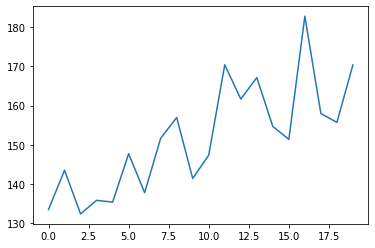

In [3]:
dfr.power.plot()

<AxesSubplot:>

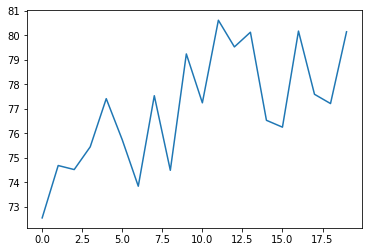

In [4]:
dfr.cadence.plot()

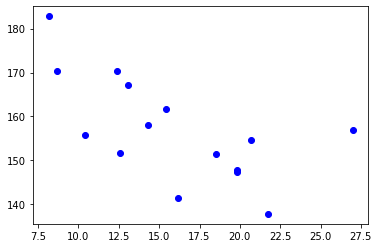

In [5]:
dfp = dfr.query('index > 4')
plt.plot(dfp.miles, dfp.power, 'bo')

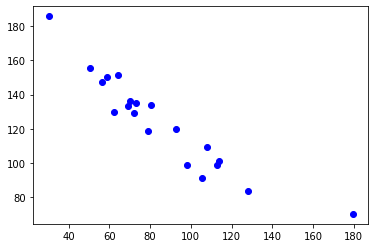

In [6]:
plt.plot(dfr.elev_per_mi, dfr['mi/kWh'], 'bo')

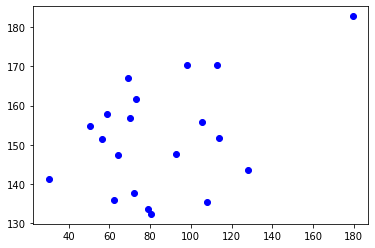

In [7]:
plt.plot(dfr.elev_per_mi, dfr.power, 'bo')

In [18]:
df = pd.read_csv('/home/tabb99/gdrive/Recreation/bike/fit-data/2022-06-24_15-40-36.csv')
df.sample(5)

,timestamp,motor_power,power,cadence,speed,distance,altitude,currAssist,curCurrentScale,curProfileScale,batCurrCap1,motorTemp
1186,2022-06-25 00:00:33,177,166,86,5.727,7338.0,78.0,2,100,35,293,39
1284,2022-06-25 00:02:11,147,199,71,6.144,7917.0,91.4,2,100,35,290,39
2566,2022-06-25 00:23:33,190,204,87,7.145,15591.0,169.2,2,100,35,228,51
2053,2022-06-25 00:15:00,8,120,87,9.897,12640.0,91.4,2,100,35,262,39
854,2022-06-24 23:55:01,92,79,78,5.365,4502.0,162.8,2,100,35,302,40


<AxesSubplot:>

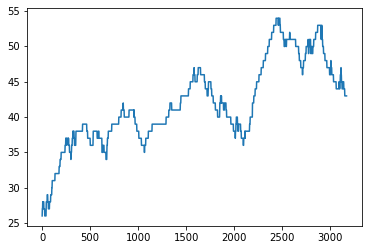

In [19]:
df.motorTemp.plot()

<AxesSubplot:>

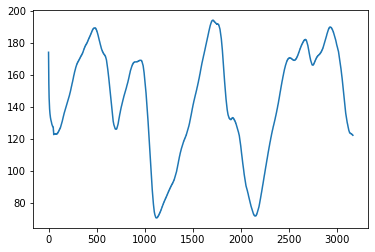

In [20]:
df.altitude.plot()

<AxesSubplot:>

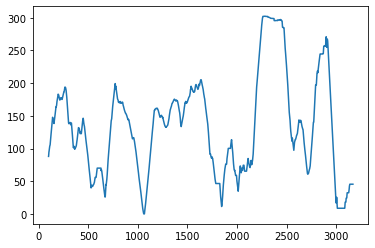

In [21]:
df.motor_power.rolling(100).mean().plot()

<AxesSubplot:>

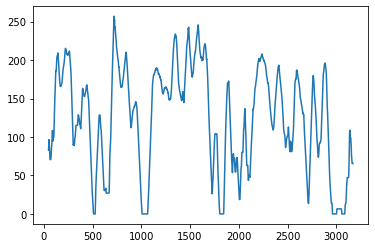

In [22]:
df.power.rolling(50).mean().plot()

<AxesSubplot:>

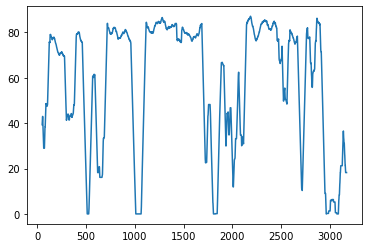

In [23]:
df.cadence.rolling(50).mean().plot()

<AxesSubplot:>

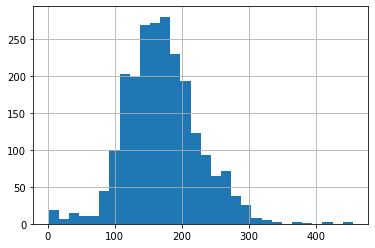

In [24]:
df[df.power > 0].power.hist(bins=30)

<AxesSubplot:>

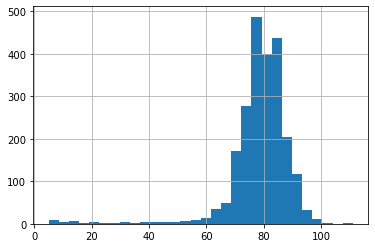

In [25]:
df[df.cadence > 0].cadence.hist(bins=30)

In [26]:
df.motor_power.sum() / df.power.sum()

1.077662752263442

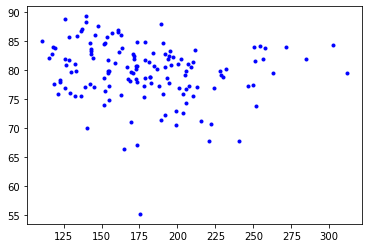

In [27]:
dfp100 = df.query('power > 100').copy()
dfp100.index = range(len(dfp100))
dfp100['ix_bin'] = dfp100.index // 15
dfp_avg = dfp100.groupby('ix_bin').mean()
plt.plot(dfp_avg.power, dfp_avg.cadence, 'b.')